# Parte 1 - Projeto de Análise de Dados

O dataset escolhido para este projeto é o Billionaires Statistics Dataset (2023). Ele contém informações sobre bilionários de diferentes países, listados em 2023.

As variáveis registram informações demográficas e financeiras de cada bilionário, como:
- name: nome do bilionário
- net_worth: patrimônio líquido em bilhões de dólares
- country: país de origem
- industry: setor de atuação
- age: idade
- gender: gênero
- self_made: se a fortuna foi herdada ou construída (self-made)



In [1]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Importando o dataset
dataset = pd.read_csv('./dataset/dataset.csv')  

In [3]:
# Conferindo as dimensões
print('Linhas:', dataset.shape[0])
print('Colunas:', dataset.shape[1])

Linhas: 2640
Colunas: 35


In [4]:
# Informações básicas sobre o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [5]:
# Exibindo as primeiras linhas 
dataset.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


Para a verificar se há dados faltantes utilizei o método dataset.isnull().sum(). Observa-se que algumas colunas, como age e organization, possuem valores nulos. Será necessário realizar o tratamento desses dados antes das análises.

In [7]:
# Conferindo a existência de dados faltantes
dataset.isnull().sum().sum()

np.int64(10812)

In [8]:
# Principais informações
dataset.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


### 🔧 Pré-processamento

Para preparar o dataset, os seguintes procedimentos serão realizados: 

- Tratamento de valores nulos: Preencher ou remover

- Conversão de formatos: Se houver necessidade

- Remoção de Outliers

### 📊 Análises a serem realizadas na EDA

As análises propostas para este projeto são:

- Verificar quais países concentram mais bilionários

- Identificar os setores de atuação mais comuns entre os bilionários

- Analisar a relação entre idade e patrimônio líquido

- Verificar a proporção de bilionários self-made em relação aos que herdaram suas fortunas

- Comparar o patrimônio líquido médio por gênero

- Identificar os bilionários mais jovens e os mais ricos

# Parte 2 - Pré - Processamento

In [13]:
df = dataset.copy()

In [14]:
df = df.drop(df.columns[14:], axis=1)
df = df.drop(['organization', 'countryOfCitizenship', 'city'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        2640 non-null   int64  
 1   finalWorth  2640 non-null   int64  
 2   category    2640 non-null   object 
 3   personName  2640 non-null   object 
 4   age         2575 non-null   float64
 5   country     2602 non-null   object 
 6   source      2640 non-null   object 
 7   industries  2640 non-null   object 
 8   selfMade    2640 non-null   bool   
 9   status      2640 non-null   object 
 10  gender      2640 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 209.0+ KB


In [16]:
# Preenchendo os dados faltantes da coluna 'age' com a média
df['age'].fillna(df['age'].mean(), inplace=True)

/tmp/ipykernel_93545/904929071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [17]:
# Preenchendo os dados faltantes da coluna 'country' com o valor mais frequente
df['country'].fillna(df['country'].mode()[0], inplace=True)

/tmp/ipykernel_93545/1549637250.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


# Parte 2 - EDA

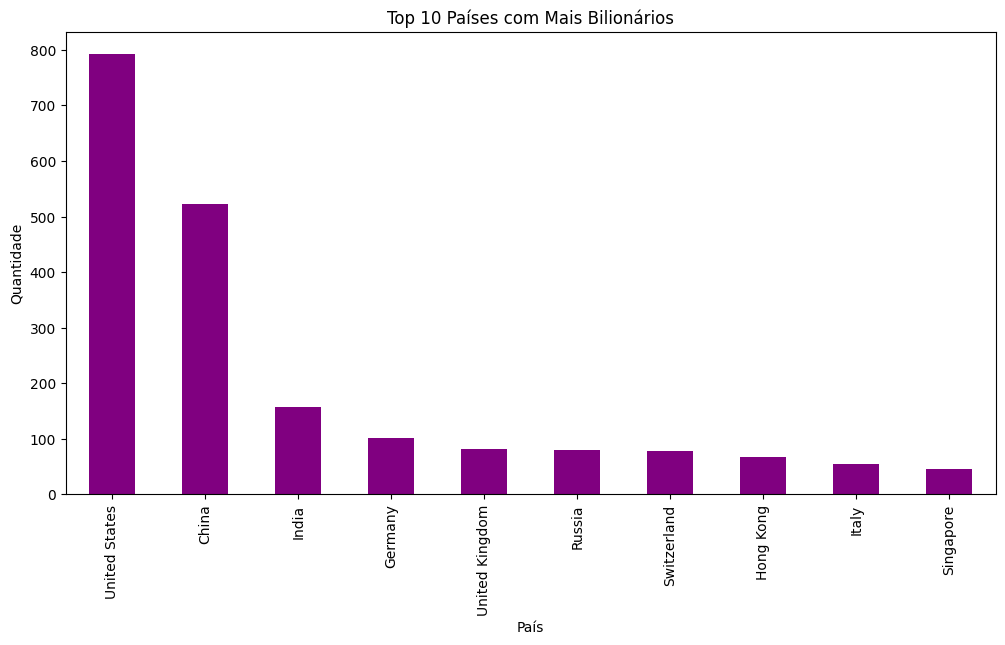

In [98]:
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='purple', title='Top 10 Países com Mais Bilionários')
plt.xlabel('País')  # Adiciona rótulo ao eixo X
plt.ylabel('Quantidade')  # Adiciona rótulo ao eixo Y
plt.show()

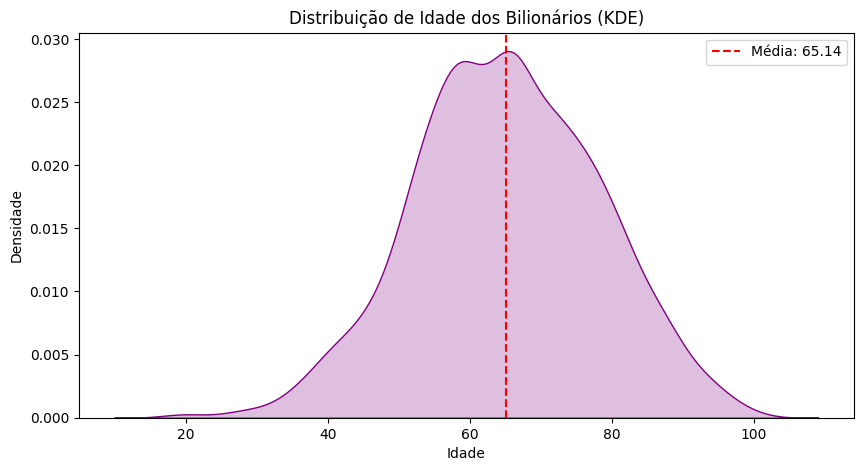

In [96]:
idade_media = df['age'].mean()
plt.figure(figsize=(10, 5))
sns.kdeplot(df['age'], fill=True, color='purple')
plt.title('Distribuição de Idade dos Bilionários (KDE)')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.axvline(idade_media, color='red', linestyle='dashed', linewidth=1.5, label=f'Média: {idade_media:.2f}')
plt.legend()
plt.show()


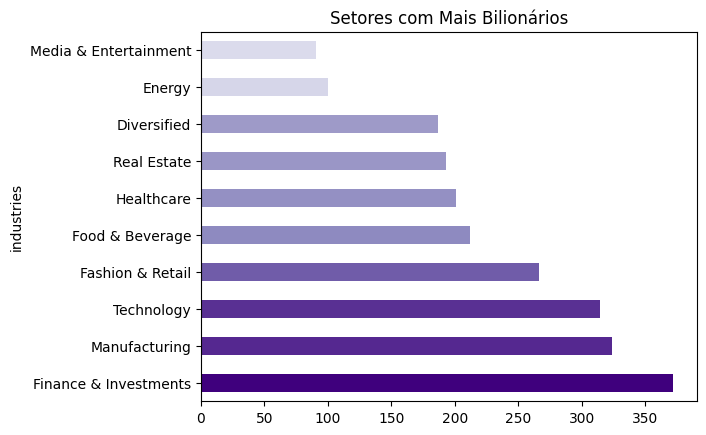

In [102]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Create a colormap
cmap = plt.cm.Purples
norm = Normalize(vmin=0, vmax=df['industries'].value_counts().head(10).max())
colors = cmap(norm(df['industries'].value_counts().head(10)))

# Plot with gradient
df['industries'].value_counts().head(10).plot(
    kind='barh',
    title='Setores com Mais Bilionários',
    color=colors
)

plt.show()


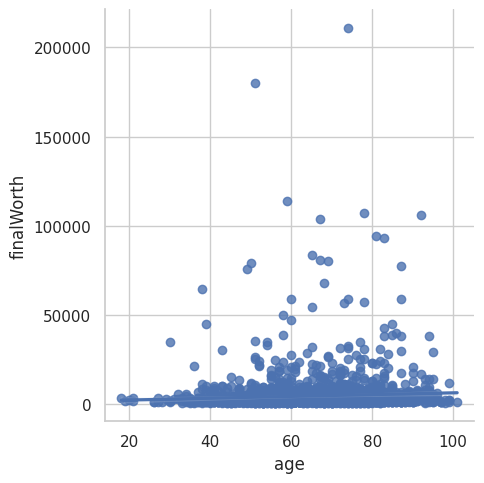

In [27]:
df['finalWorth'] = df['finalWorth'] / 1000
sns.lmplot(x='age', y= 'finalWorth', data=dataset)

<Axes: ylabel='count'>

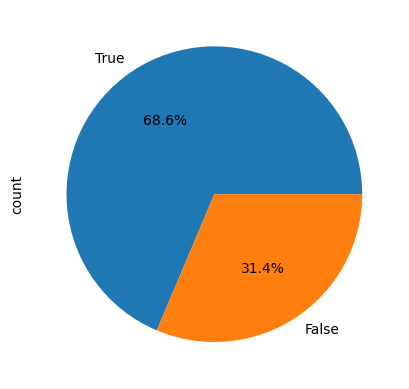

In [22]:
dataset['selfMade'].value_counts().plot(kind='pie', autopct='%1.1f%%')

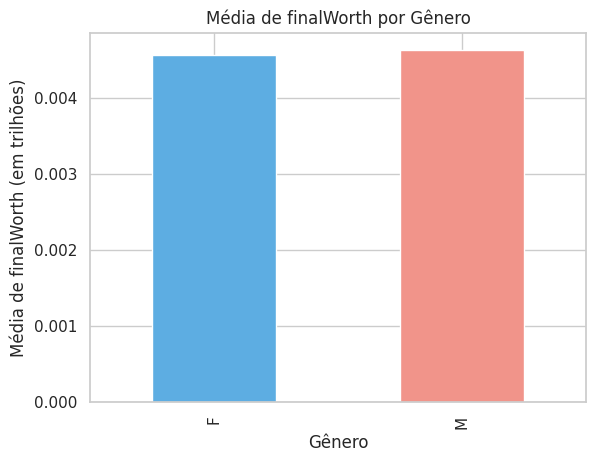

In [32]:
# Agrupando por gênero e calculando a média de finalWorth
mean_finalWorth_by_gender = df.groupby('gender')['finalWorth'].mean()

# Criando o gráfico de barras
mean_finalWorth_by_gender.plot(kind='bar', color=['#5DADE2', '#F1948A'], title='Média de finalWorth por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de finalWorth (em trilhões)')
plt.show()

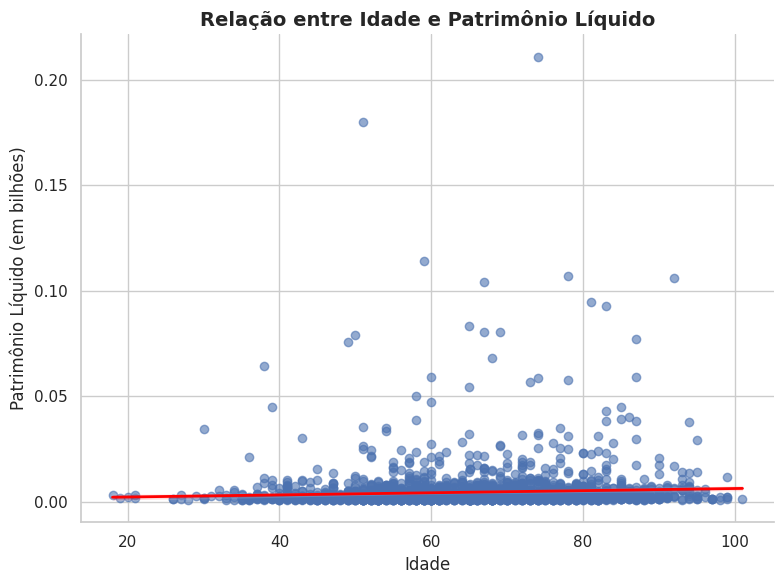

In [36]:
# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Gráfico com linha de regressão
sns.regplot(
    data=df,
    x='age',
    y='finalWorth',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red', 'lw': 2}
)

# Títulos e labels
plt.title('Relação entre Idade e Patrimônio Líquido', fontsize=14, weight='bold')
plt.xlabel('Idade')
plt.ylabel('Patrimônio Líquido (em bilhões)')
sns.despine()

plt.tight_layout()
plt.show()